<h1 align="center"> Natural Language Processing </h1>

<img src="../images/img1.jpg" alt="img1" style="width: 400px"/>

## Program so far 
***

* Python
* Statistics
* Supervised Machine Learning
* Unsupervised Machine Learning

## Agenda for NLP
***
* Get awesome in NLP

## But Seriously, Agenda for the Day
***
Learn how to leverage machine learning techniques we have learnt so far to analyze Natural Languages. We are going to cover techniques like:

1.  Sentence Splitter
-  Tokenization
-  POS (part of speech tagging)
-  Stop-word Removal
-  Stemming
-  Lemmatization
-  Chunking
-  Deep Parsing
-  Word Cloud
-  TF-IDF

## What is NLP Anyway

Well, Wikipedia quotes:

>Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora. 

## What is NLP Anyway

Human language is highly ambiguous… It is also ever changing and evolving. People are great at producing language and understanding language, and are capable of expressing, perceiving, and interpreting very elaborate and nuanced meanings. At the same time, while we humans are great users of language, we are also very poor at formally understanding and describing the rules that govern language.

NLP is an ongoing attempt to capture those structures and rules.

## NLP NLP Everywhere

[Lifewire](https://www.lifewire.com/applications-of-natural-language-processing-technology-2495544) has an elaborate article on the applications of NLP. NLP is being used extensively in areas you can and can't imagine. Some examples are:

1. Spam detections
2. Chat bots
- Recommender systems
3. Sentiment analysis
4. Information extraction
5. And many more

So let's start our journey with NLP. Here is an interesting challenge we are going to tackle.

We are going to work with data called `Reuter_50_50 Data Set`. It is a combination of 50 datasets. Each dataset is named after an author's name and each dataset contains 50 articles from the respective author. 

The problem that we are going to attempt is to use this data is to predict the author given an unknown article. Seems interesting, isn't it? Well, it is. 

Generally, as writers, we all follow certain style; things like kind of words we use, length of the sentences we write, how do we use punctuations etc. We are going to use these to predict the author.

Let's start by importing the docs.

In [1]:
import os
os.listdir("../data/C50train")

['RobinSidel',
 'LynnleyBrowning',
 'KouroshKarimkhany',
 'MichaelConnor',
 'JoeOrtiz',
 'EricAuchard',
 'AaronPressman',
 'SimonCowell',
 "LynneO'Donnell",
 'EdnaFernandes',
 'KevinMorrison',
 'SamuelPerry',
 'PatriciaCommins',
 'JohnMastrini',
 'JanLopatka',
 'KevinDrawbaugh',
 'KarlPenhaul',
 'MartinWolk',
 'ScottHillis',
 'DavidLawder',
 'FumikoFujisaki',
 'MarcelMichelson',
 'NickLouth',
 'DarrenSchuettler',
 'WilliamKazer',
 'TanEeLyn',
 'PierreTran',
 'HeatherScoffield',
 'MureDickie',
 'RogerFillion',
 'JimGilchrist',
 'BradDorfman',
 'AlanCrosby',
 'JonathanBirt',
 'BenjaminKangLim',
 'TheresePoletti',
 'KeithWeir',
 'JoWinterbottom',
 'MarkBendeich',
 'JaneMacartney',
 'MatthewBunce',
 'ToddNissen',
 'PeterHumphrey',
 'TimFarrand',
 'SarahDavison',
 'GrahamEarnshaw',
 'BernardHickey',
 'KirstinRidley',
 'AlexanderSmith',
 'LydiaZajc']

In [2]:
#Lets look into of the article by one of the author and experiment with some NLP tasks
f = open("../data/C50train/AaronPressman/2537newsML.txt")
f.read()

'A break-in at the U.S. Justice Department\'s World Wide Web site last week highlighted the Internet\'s continued vulnerability to hackers.\nUnidentified hackers gained access to the department\'s web page on August 16 and replaced it with a hate-filled diatribe labelled the "Department of Injustice" that included a swastika and a picture of Adolf Hitler.\nJustice officials quickly pulled the plug on the vandalised page, but the security flaws that allowed hackers to gain entry likely exist in thousands of other corporate and government web sites, security experts said.\n"The vast majority of sites are vulnerable," said Richard Power, senior analyst at the Computer Security Institute. "The Justice Department shouldn\'t be singled out."\nJustice Department officials said the compromised web site was not connected to any computers containing sensitive files. The web site (http://www.usdoj.gov) included copies of press releases, speeches and other publicly available information.\nThe secu

## We told you so!
***

Now the question is what to do with all the text we have got? One way is to feed the text as a feature to a ML algorithm and try to predict the target variable.

But that would be known as **Supreme Overfitting**. Can you explain why?

Remember **Feature Engineering** session of your machine learning module? We told you: "This is one of the most important aspect of ML problem solving." Now you'll understand why.

## NLP and Feature engineering:

Much of NLP falls under the domain of feature engineering and feature selection. The idea is to take the raw text and turn into something which can be utilized by a ML algorithm to carry out prediction.

So the question is how to do feature engineering on text.

<img src="../images/img2.png" alt="img2" style="width: 400px"/>

## Sentence Segmentation

The first level of conquering we will do is by breaking the articles into sentences. 

Often we have to do analysis at sentences level. For example, let's say in this problem we want to check **number of sentences in an article** and **number of words in a sentence**. Or we want to see how many times an author uses **punctuations in a sentence**. Even specific things like **how many capital letters he uses in a sentence.** We can think of an infinite features.

## Sentence Segmentation

It might look simple to split text by a period(.), but we often use period within text as well e.g. Mr. Modi. There are many other variations that could be there for which we have account for. For example, question marks (?), exclamations (!) and so on.

This could get cumbersome. Thankfully there is a python library called **`NLTK`** which specializes in all sorts of NLP operations. For example, NLTK comes with a trained model to do sentence segmentation. We will discover many others  along the way. But for now, let's start with importing the library.

In [3]:
#NLTK is famous package in python for carry out NLP tasks. Though there are other options also available such as Spacy, TextBlob etc
import nltk

text=open("../data/C50train/AaronPressman/2537newsML.txt").read()
sents = nltk.sent_tokenize(text)  ## Easy sentence tokenization
print("\n".join(sents[:5]))

A break-in at the U.S. Justice Department's World Wide Web site last week highlighted the Internet's continued vulnerability to hackers.
Unidentified hackers gained access to the department's web page on August 16 and replaced it with a hate-filled diatribe labelled the "Department of Injustice" that included a swastika and a picture of Adolf Hitler.
Justice officials quickly pulled the plug on the vandalised page, but the security flaws that allowed hackers to gain entry likely exist in thousands of other corporate and government web sites, security experts said.
"The vast majority of sites are vulnerable," said Richard Power, senior analyst at the Computer Security Institute.
"The Justice Department shouldn't be singled out."


## Tokenization

Next, We tokenize. Tokenization breaks unstructured data, text, into chunks of information which can be counted as discrete elements.
This immediately turns an unstructured string (text document) into a more usable data, which can  be further structured,and made more suitable for machine learning.

## Tokenization

-  Tokenization segments a document into its atomic elements (tokens). Tokens are generally split by space or punctuations.
-  Typically, tokens are the words.
-  Sometimes, based over our application, we can treat punctuations as tokens as well. For example, for author identification we want to have a feature, <i>number of punctuations<i>.
-  Number of tokens in a sentence can be used as a feature.
-  Kind of tokens(words) used in text itself can be a feature. For example, some author may use word basically, additionally etc. 

Let's employ a simple tokenizer which will match any word characters until it reaches a non-word character, like white a space

In [4]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(sents[0])

['A',
 'break',
 'in',
 'at',
 'the',
 'U',
 'S',
 'Justice',
 'Department',
 's',
 'World',
 'Wide',
 'Web',
 'site',
 'last',
 'week',
 'highlighted',
 'the',
 'Internet',
 's',
 'continued',
 'vulnerability',
 'to',
 'hackers']

- As you can see,this can cause problems for words like don’t which will be read as two tokens - don and t.
- There are better tokenisers available like `TreeBankWordTokenizer` which would break words like don't into do and n't
- NLTK provides a number of pre-constructed tokenizers. Let's see one of those.

In [8]:
from nltk import word_tokenize
tokens = word_tokenize(sents[0])
print tokens

['A', 'break-in', 'at', 'the', 'U.S.', 'Justice', 'Department', "'s", 'World', 'Wide', 'Web', 'site', 'last', 'week', 'highlighted', 'the', 'Internet', "'s", 'continued', 'vulnerability', 'to', 'hackers', '.']


## StopWords

Consider words like a, an, the, be etc. These words don't add any extra information in a sentence. Such words can often create noise while modeling. Such words are known as **Stop Words**.

Generally there is a standard list of stop words and that list is also included within the NLTK. However, it also comes with a lot of corpora (a corpus is specialized knowldege for a specific domain/problem. e.g. gender names, location names, or author notes), Which are useful in special cases. We need to download these corpus explicitly along with nltk. This can be done through `nltk.download()` 

In [6]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
print stop_words

set([u'all', u'just', u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'o', u'hadn', u'herself', u'll', u'had', u'should', u'to', u'only', u'won', u'under', u'ours', u'has', u'do', u'them', u'his', u'very', u'they', u'not', u'during', u'now', u'him', u'nor', u'd', u'did', u'didn', u'this', u'she', u'each', u'further', u'where', u'few', u'because', u'doing', u'some', u'hasn', u'are', u'our', u'ourselves', u'out', u'what', u'for', u'while', u're', u'does', u'above', u'between', u'mustn', u't', u'be', u'we', u'who', u'were', u'here', u'shouldn', u'hers', u'by', u'on', u'about', u'couldn', u'of', u'against', u's', u'isn', u'or', u'own', u'into', u'yourself', u'down', u'mightn', u'wasn', u'your', u'from', u'her', u'their', u'aren', u'there', u'been', u'whom', u'too', u'wouldn', u'themselves', u'weren', u'was', u'until', u'more', u'himself', u'that', u'but', u'don', u'with', u'than', u'those', u'he', u'me', u'myself', u'ma', u'these', u'up', u'will', u'below', u'ain

In [12]:
filtered_sentence = [w for w in tokens if not w in stop_words]
filtered_sentence = []

for w in tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(tokens)
print"================================================================================="
print(filtered_sentence)

['A', 'break-in', 'at', 'the', 'U.S.', 'Justice', 'Department', "'s", 'World', 'Wide', 'Web', 'site', 'last', 'week', 'highlighted', 'the', 'Internet', "'s", 'continued', 'vulnerability', 'to', 'hackers', '.']
['A', 'break-in', 'U.S.', 'Justice', 'Department', "'s", 'World', 'Wide', 'Web', 'site', 'last', 'week', 'highlighted', 'Internet', "'s", 'continued', 'vulnerability', 'hackers', '.']


-  More often than not, Stop-Words are removed before building models.
-  However, sometimes we even uses stop words as a feature as well. For example, in author identification, number of stop words can be used as a feature.

## Stemming And Lemmatization

Consider following words: Copy, copied, copying. 

Although they represent the same meaning, if not treated, our model might treat them differently. So we tend to strip such words to their core. We can do that by stemming or lemmatisation.

Stemming and Lemmatization are the basic text processing methods for English text. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. 

-  Stemming helps to create groups of words which have similar meanings.
-  Stemming works based over set of rules, such as remove ing if words is ending with ing.
-  There are a number of Stemmers available with different set of rules. PorterStemmer, LancasterStemmer, SnowballStemmer etc are example of stemmers and are available in NLTK.

In [14]:
#-----PorterStemmer------
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
porter_stemmer.stem("crying")


u'cri'

In [15]:
#-----LancasterStemmer------
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
lancaster_stemmer.stem("crying")

'cry'

In [16]:
#-----SnowballStemmer------
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer("english")
snowball_stemmer.stem("crying")

u'cri'

**Lemmatization** is closely related to Stemming, but difference is lemmatization uses a knowledgebase called WordNet. Because of knowledge, lemmatization can even convert words which are different and cant be solved by stemmers, such as **converting went into go**. The NLTK Lemmatization method is based on WordNet’s built-in morphy function.

In [19]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
wordnet_lemmatizer.lemmatize("went", pos="v")

u'go'

## Word Cloud

Word CLoud is the EDA equivalent for NLP. Word cloud helps us understand how different words are distributed across the documents. The most occurring words will have larger sizes. 

(-0.5, 399.5, 199.5, -0.5)

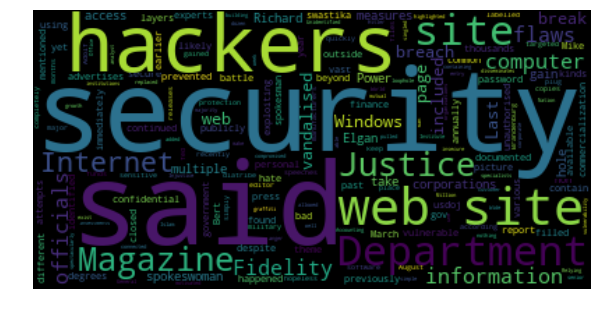

In [22]:
textall = " ".join(sents)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(textall)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

As can be seen, this particular word could strongly suggests that the article is likely to be about cyber security. Plotting and observing a word cloud could unlock potential features and can also avoid pitfalls. For examples, if you see a certain words which should be treated as stop words occurring a lot, then you can take care of them.

## Implementations Of NLP Applications
***

Good! What we have learnt so far is the foundation for different types of analysis that can be carried out. The tokens we have created so far can be utilized as needed. Mainly there are 4 kinds different techniques which branch out from here.

1. **Regular Expressions Based System:** 
    - Such as Extracting Dates, Hyperlinks etc.
    - These are mostly rule based and mostly used as features for rest of the techniques
2. **Machine Learning Based System.** 
    - Text classification or Clustering or Recommender Systems.
    - These techniques use the tokens as features, further refine them to create features of them
    - Include 
2. **Linguistics based system/Rule Based System.** 
    - Such as POS tagging
    - Attempts to understand underlying structure of the statements
- **Dictionary lookup based system** 
    - Such Information Reterieval, or Identifying entites from wikipedia.
    - Used to retrieve structured information from unstructured documents
    - Creating summaries of given documents

Next we are going to look into Machine Learning based NLP applications, wherein we are going to use Sklearn to build a classifier.

## Text Preprocessing using `sklearn`:


### Bag-of-Words Approach:


One way to use tokenized words is to create bag of words (tokens) for each observation and find out the frequency of occurring of each token. The underlying assumption is that the article or document will use tokens which are important much more frequently than others. 

For example, in the word cloud that we saw, since the article seemed to about cyber security, related terms were used more frequently. So if in an article, food related words are used frequently, it can inferred that the article is about food.

Note: Considering this, it would make much more sense to remove stopwords, otherwise they will clutter the actual tokens.

We use this fact, and count the frequency of each term used in an article. We also put together all the tokens in all the documents combined along with their frequency. We call this **The Dictionary of tokens**. Consider the following example from [Machine Learning Mastery Blog](https://machinelearningmastery.com/gentle-introduction-bag-words-model/). Lines from a tale of two cities.

    It was the best of times,
    it was the worst of times,
    it was the age of wisdom,
    it was the age of foolishness,

Frequency doc for the first line would look something like:

* “it” = 1
* “was” = 1
* “the” = 1
* “best” = 1
* “of” = 1
* “times” = 1
* “worst” = 0
* “age” = 0
* “wisdom” = 0
* “foolishness” = 0

To make this more usable, we convert these frequency tables into vectors: [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

Frequency table for the rest of the lines are:

* "it was the worst of times" = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]
* "it was the age of wisdom" = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]
* "it was the age of foolishness" = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]

A more sophisticated approach is to also create a vocabulary of grouped words. This both changes the scope of the vocabulary and allows the bag-of-words to capture a little bit more meaning from the document.

In this approach, each word or token is called a “gram”. Creating a vocabulary of two-word pairs is, in turn, called a bigram model. Again, only the bigrams that appear in the corpus are modeled, not all possible bigrams

For example, the bigrams in the first line of text in the previous section: “It was the best of times” are as follows:

* “it was”
* “was the”
* “the best”
* “best of”
* “of times”

This process of converting NLP text into numbers in called **vectorization** in ML. And there are multiple ways to convert text into vectors.

* **Counts.** Count the number of times each word appears in a document.
* **Frequencies.** Calculate the frequency that each word appears in a document out of all the words in the document.

Based on how we create this scoring, there are following methods:

1. **CountVectorizer**: CountVectorizer works on Terms Frequency, i.e. counting the occurrences of tokens and building a sparse matrix of documents x tokens.
2. **TfIdfVectorizer**: We will cover next

For now, let's apply count vectorizer to see how well we can predict author of the article.

In [63]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()

In [64]:
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

So here we can all sort of parameters this vectorizer takes. tokenizer, stop words, encoding, lower case etc. We can tune parameters based over our data set and kind of problem we are trying to solve.

In [65]:
# use TreeankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x1159a6110>>,
        vocabulary=None)

**Note:** vect takes data as rows of text. Hence, we will have to get X_train in that format.
So our dataset is not a csv and its a file structure based data. So we have to traverse through files and create a data frame of training data and its labeles, as below. 

Let's start by importing necessary information.

In [66]:
import os
import numpy as np
trainX =np.array([])
labels = []
path = '../data/C50train/'
authors = os.listdir(path)[:10]; 

Next, we separate out the X and y component from each document. Note that we have replaced new line character (considered as a stop word) with white space.

In [67]:
for auth in authors:
    files = os.listdir(path + auth + '/');
    tmpX, tmpY = np.array([]), []
    for file in files:
        f = open(path + auth + '/' + file, 'r')
        data = f.read().replace('\n', ' ')
        tmpX = np.append(tmpX,data)
        tmpY = tmpY + [auth]
        f.close()
    trainX = np.append(trainX, tmpX)
    labels = labels + tmpY 
# print trainX
# print labels

Below are the first elements from X and y

In [68]:
print trainX[0]

Drugstore giant Revco D.S. Inc. said Monday it agreed to buy regional chain Big B Inc. in a sweetened takeover valued at $380 million. The transaction calls for Twinsburg, Ohio-based Revco to buy all outstanding shares of Big B common stock for $17.25 per share, up from Revco's unsolicited offer of $15 per share, which Big B rejected last month. "We are very excited about the combination of Revco and Big B. I am pleased we were able to bring this process to a fast and successful conclusion," said Dwayne Hoven, president and chief executive officer of Revco. The deal will combine the nation's second- and 10th-largest drug store chains. The companies said Big B's board of directors unanimously approved the latest offer and recommended that Big B shareholders tender their shares. The sale of Bessemer, Ala.-based Big B marks the latest acquisition in the rapidly consolidating drugstore industry. Rite Aid Corp. signed an agreement this month to buy West Coast chain Thrifty PayLess Inc. for 

In [69]:
print labels[0]

RobinSidel


Now let's separate out Train and test sets

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainX, labels, train_size = 0.8)

X_train[1]

'Talks aimed at averting a Chinese ban on imports of United States poultry have been hailed as a success by U.S. officials, who said on Friday they expected the issue to vanish without any disruption to a major market. A Chinese ban on imports of poultry and poultry products from 10 U.S. states, worth nearly US$500 million a year, was now unlikely to be implemented, official U.S. sources said. "I\'m optimistic that the issue has been resolved," a U.S. diplomat in Beijing said by telephone. "Hopefully, this thing will now be dropped. I\'m not expecting any correspondence or a list -- sometimes no news is good news," he said, speaking on condition of anonymity. A two-man team from Washington\'s Animal and Plant Health Inspection Service (APHIS) spent two days in meetings with China\'s Administration of Animal and Plant Quarantine (CAPQ) and scientists from other government departments and universities. The aim of the talks was to convince CAPQ that U.S. poultry does not carry a virus cal

Now we take the features, which are in list format and convert them into pandas series so that various operations can be carried out easily.

In [71]:
import pandas as pd
X_train = pd.Series(X_train)
X_test = pd.Series(X_test)

X_train.head()

0    Russia's aluminium industry has roared back to...
1    Talks aimed at averting a Chinese ban on impor...
2    Britain's fraud watchdog, the Serious Fraud Of...
3    Stagecoach, the British bus and rail group whi...
4    Fears China has been cancelling soybean and so...
dtype: object

Now, let's fit the vectorization pipeline that we defined earlier.

In [72]:
# learn the 'vocabulary' of the training data
vect.fit(X_train)

# examine the fitted vocabulary
vect.get_feature_names()[:50]

[u'!',
 u'! consumer',
 u'! online',
 u'$ /tonne',
 u'$ 0.04',
 u'$ 0.10',
 u'$ 0.20',
 u'$ 0.42',
 u'$ 1',
 u'$ 1,250',
 u'$ 1,305',
 u'$ 1,800',
 u'$ 1,942/45',
 u'$ 1.1',
 u'$ 1.125',
 u'$ 1.2',
 u'$ 1.23',
 u'$ 1.25',
 u'$ 1.27',
 u'$ 1.3',
 u'$ 1.32',
 u'$ 1.375',
 u'$ 1.38',
 u'$ 1.4',
 u'$ 1.5',
 u'$ 1.50',
 u'$ 1.56',
 u'$ 1.7',
 u'$ 1.75',
 u'$ 1.8',
 u'$ 1.875',
 u'$ 10',
 u'$ 100',
 u'$ 100,000',
 u'$ 100-per-share',
 u'$ 11.1',
 u'$ 110',
 u'$ 111.125',
 u'$ 117',
 u'$ 12',
 u'$ 12.50',
 u'$ 120',
 u'$ 122.50',
 u'$ 130.',
 u'$ 14',
 u'$ 145',
 u'$ 15',
 u'$ 15.625',
 u'$ 150',
 u'$ 156.25']

We can see that there some scope for better feature engineering
* "!" and "$" are appearing along with the numbers
* numbers can be clubbed into a single category and can be tagged as numbers (e.g. ####)
* Dates, Times can be tagged

There are many more things that can be done. But for now let's move on.

Next, we transform training data into a 'document-term matrix'

In [45]:
train_vectors = vect.transform(X_train)
train_vectors

<400x27459 sparse matrix of type '<type 'numpy.int64'>'
	with 129354 stored elements in Compressed Sparse Row format>

In [46]:
test_vectors = vect.transform(X_test)
test_vectors

<100x27459 sparse matrix of type '<type 'numpy.int64'>'
	with 25476 stored elements in Compressed Sparse Row format>

Next, we examine the vocabulary and document-term matrix together

In [53]:
pd.DataFrame(train_vectors.toarray(), columns=vect.get_feature_names()).head(4)

,!,! consumer,! online,$ /tonne,$ 0.10,$ 0.19,$ 0.20,$ 0.48,$ 0.90,$ 1,...,zealand,zenit,zenit rockets,zero,zhu,zhu rongji,zinc,zinc (,zinc liquidated,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see, there are 27459 columns which are there. Most of them are going to sparse.

## Lets Build our Model

We are going to use Naive Baysian model here as they are very effective at text classification.

In [56]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/8yvBqhm92xA" frameborder="0" allowfullscreen></iframe>')

You can read more about bayesian algorithms at: 

* [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
* [Resource](https://www.cs.toronto.edu/~urtasun/courses/CSC411/tutorial4.pdf)

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
nb = GaussianNB()

In [58]:
nb.fit(train_vectors.toarray(), y_train)

GaussianNB(priors=None)

In [61]:
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.cross_validation import cross_val_predict

# generate your cross-validation prediction with 10 fold Stratified sampling
y_pred = cross_val_predict(nb, test_vectors.toarray(), y_test, cv=10)

print(classification_report(y_test, y_pred))
print "ACCURACY::", accuracy_score(y_pred, y_test)

                   precision    recall  f1-score   support

    AaronPressman       0.75      0.67      0.71         9
    EdnaFernandes       0.67      0.29      0.40         7
      EricAuchard       0.59      0.87      0.70        15
         JoeOrtiz       0.58      0.88      0.70         8
KouroshKarimkhany       0.89      0.73      0.80        11
   LynneO'Donnell       0.90      1.00      0.95         9
  LynnleyBrowning       0.77      1.00      0.87        10
    MichaelConnor       0.80      0.67      0.73        12
       RobinSidel       0.83      0.50      0.62        10
      SimonCowell       0.71      0.56      0.63         9

      avg / total       0.75      0.73      0.72       100

ACCURACY:: 0.73


As we can see, even with limited amount of feature engineering, we are getting really good results. Better feature engineering will result in better results.

## Model Building Using TF-IDF Vectorizer:

* Tf-idf vectorizer is most famous and most widely used vectoirzer in NLP. 
* Tf-idf stands for term frequency-inverse document frequency, 
* Tf-idf weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. 
* The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

## Model Building Using TF-IDF Vectorizer:

Typically, the tf-idf weight is composed by two terms: 
* the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; 
* the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

* **TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

$$TF(t) = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document} {Total\ number\ of\ terms\ in\ the\ document}$$

* **IDF: Inverse Document Frequency,** which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

$$IDF(t) = log_e(\frac{Total\ number\ of\ documents} {Number\ of\ documents\ with\ term\ t\ in\ it})$$

Typically, IDF is a measure of how rare a term is. Rarer the term, more is the IDF score.

$$Tf-TDF score = TF * IDF$$

In [73]:
# import and instantiate TfidfVectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [86]:
# train_vectors = vect.fit_transform(X_train)
# train_vectors

### Lets Build our Model

In [85]:
# from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# nb=GaussianNB()
# nb.fit(train_vectors.toarray(), y_train)

### Lets Analyze performance

In [84]:
# generate your cross-validation prediction with 10 fold Stratified sampling
# y_pred = cross_val_predict(nb, test_vectors.toarray(), y_test, cv=10)

# print(classification_report(y_test, y_pred))
# print "ACCURACY::",accuracy_score(y_pred,y_test)

## Applications of Bag-of-Words

The bag-of-words model is very simple to understand and implement and offers a lot of flexibility for customization on your specific text data.

It has been used with great success on prediction problems like 

* Language modeling
* Documentation classification
* Recommender Systems
* Clustering

## Limitations of Bag-of-Words approach

Nevertheless, it suffers from some shortcomings, such as:

* **Meaning**: Discarding word order ignores the context, and in turn meaning of words in the document (semantics). Context and meaning can offer a lot to the model, that if modeled could tell the difference between the same words differently arranged (“this is interesting” vs “is this interesting”), synonyms (“old bike” vs “used bike”), and much more.
* **Vocabulary**: The vocabulary requires careful design, most specifically in order to manage the size, which impacts the sparsity of the document representations.
* **Sparsity**: Sparse representations are harder to model both for computational reasons (space and time complexity) and also for information reasons, where the challenge is for the models to harness so little information in such a large representational space.

# In-session Recap Time
***
- Sentence Decomposition
- Tokenization
- Stop word removal
- Word Cloud
- Vectorization
- Text Classification

# Thank You
***
### Coming up next - NLP 102

For more queries - Reach out to academics@greyatom.com 